## Funcionamiento de la app
En este notebook se encuentran los ejemplos de como van a ser llamados y utilizados los atributos de la clase ColorSelector, esto con el fin de hacer sencillo el uso en la aplicación.

In [1]:
import matplotlib.pyplot as plt
from colorSelection import ColorSelector 
import cv2

Eroding
Eliminating background


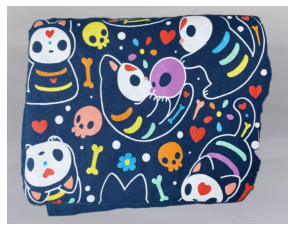

In [2]:
# Necesario: path de la imagen 
image_path = 'images/imagen_nuevo_fondo.jpg'
image_path_degradado = 'images/degradado3.jpg'


cs = ColorSelector(imagePath=image_path, colorNumber=12)
cs.visualizeImage()


(-0.5, 3709.5, 2871.5, -0.5)

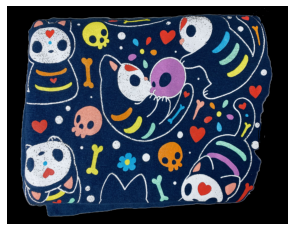

In [3]:
# se puede visualizar la imagen segmentada
plt.figure(figsize=(6, 4))
plt.imshow(cs.preprocessed)
plt.axis('off')

Fitting KMeans


C:\Users\k513eq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


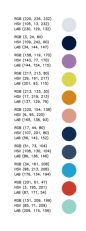

In [4]:
# Encontrar los colores de la imagen 
rgb,hsv,lab,resulting_image = cs.obtainColors()

# Guardar y enseñar imagen
rirgb = cv2.cvtColor(resulting_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('images/output.png', rirgb)

plt.imshow(list(resulting_image))
plt.axis('off')
plt.show()

## Comparacion de colores con otra imagen

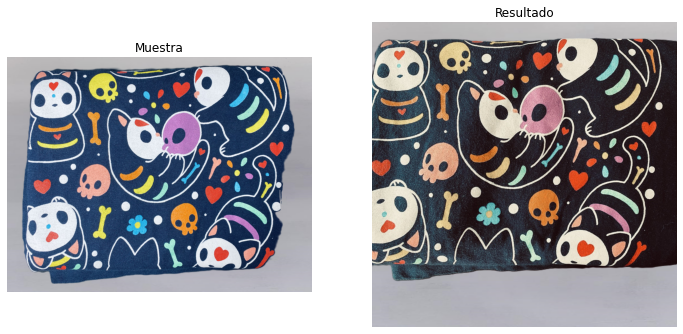

In [5]:
# guardar el path de la imagen a comparar 
file_path2 = 'images/gatitos_para_comparar_nuevo_fondo.png'
aComparar = cs.loadImage2Compare(file_path2)

# view
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(cs.image, cmap='gray')
plt.title('Muestra')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aComparar, cmap='gray')
plt.title('Resultado')
plt.axis('off')

plt.show()

In [6]:
# se calculan los colores y se compara con aquellos de la imagen original
comparaciones = cs.compare_with_new_image(rgb)

comparaciones[0]

Eroding
Eliminating background
Fitting KMeans


C:\Users\k513eq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'Color original (RGB)': (220, 226, 232),
 'Color original (LAB)': array([230, 129, 132], dtype=uint8),
 'Color original (HSV)': array([105,  13, 232], dtype=uint8),
 'Indice correspondiente a menor distancia': 0,
 'Color correspondiente (RGB)': (223, 217, 200),
 'Color correspondiente (LAB)': array([218, 123, 123], dtype=uint8),
 'Color correspondiente (HSV)': array([ 22,  26, 223], dtype=uint8),
 'Distancia Euclideana en RGB': 33.37663853655727}

In [7]:
# se puede crear un dataFrame para visualizar los resultados 
import pandas as pd
resultados = pd.DataFrame(comparaciones)
resultados

,Color original (RGB),Color original (LAB),Color original (HSV),Indice correspondiente a menor distancia,Color correspondiente (RGB),Color correspondiente (LAB),Color correspondiente (HSV),Distancia Euclideana en RGB
0,"(220, 226, 232)","[230, 129, 132]","[105, 13, 232]",0,"(223, 217, 200)","[218, 123, 123]","[22, 26, 223]",33.376639
1,"(3, 24, 60)","[34, 144, 147]","[109, 242, 60]",4,"(30, 41, 52)","[45, 131, 137]","[105, 108, 52]",32.893768
2,"(158, 119, 170)","[144, 154, 115]","[143, 77, 170]",3,"(185, 133, 119)","[144, 136, 99]","[6, 91, 185]",59.380131
3,"(217, 213, 80)","[201, 93, 115]","[29, 161, 217]",8,"(209, 175, 131)","[177, 122, 106]","[17, 95, 209]",64.101482
4,"(213, 133, 30)","[137, 129, 79]","[17, 219, 213]",2,"(190, 105, 43)","[114, 139, 78]","[13, 197, 190]",38.496753
5,"(220, 154, 138)","[165, 138, 93]","[6, 95, 220]",8,"(209, 175, 131)","[177, 122, 106]","[17, 95, 209]",24.718414
6,"(17, 44, 80)","[56, 142, 152]","[107, 201, 80]",4,"(30, 41, 52)","[45, 131, 137]","[105, 108, 52]",31.016125
7,"(51, 73, 104)","[86, 138, 146]","[108, 130, 104]",10,"(60, 69, 71)","[75, 127, 134]","[95, 40, 71]",34.438351
8,"(34, 161, 208)","[176, 134, 194]","[98, 213, 208]",7,"(109, 159, 150)","[162, 116, 153]","[85, 80, 159]",94.831429
9,"(201, 61, 47)","[87, 171, 54]","[3, 195, 201]",6,"(181, 54, 15)","[76, 166, 58]","[7, 234, 181]",38.379682


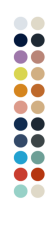

In [8]:
# visualizamos los colores más cercanos
cs.visualize_comparison(comparaciones)

## Resultados de una imagen con degradado


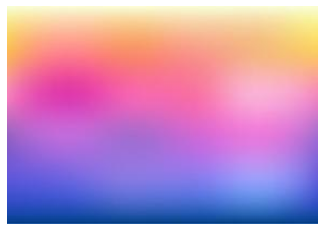

In [3]:
# cargamos la imagen con degradado
image_path = 'images/degradado3.jpg'
cs_degradado = ColorSelector(imagePath=image_path, colorNumber=8)
cs_degradado.visualizeImage()

C:\Users\k513eq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


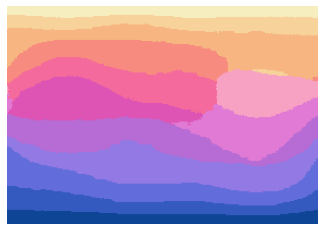

In [6]:
imagenSegmentada = cs_degradado.obtainColorsGradientImage()
plt.imshow(list(imagenSegmentada))
plt.axis('off')

plt.show()
